## CLASSIFY HIGHLY UNBALANCED DATA

This Notebook is a step by step approach to make a classifier on a highly unbalanced dataset with 6 classes in which 77 % of the data falls in Class 1.

I have resampling technique to overcome this unbalanced issue. As you know, there are two ways to handle it either by OVERSAMPLING or UNDERSAMPLING. I have tried both the techniques to see which will perform better.

For OVERSAMPLING - I used SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line. 

For UNDERSAMPLING - Undersampling techniques falls under two category - 

**"Select To Keep or Select To Delete"**

SELECT TO KEEP - Techniques under this category selects some of the values from the majority class applying some algorithms. e.g. NearMiss 1,2,3 and Condensed Nearest Neighbor

SELECT TO DELETE - It applies algorithm (KNN) to delete some of the values from the majority class. e.g. Tomek Links, Edited Nearest Neighbors

****

## CONCLUSION

Because the data is highly dimensional that is it has lots of feature , in that case, oversampling techniques like SMOTE performs very bad, whereas undersampling techniques performed better. 

Hence we can conclude SMOTE does not perform well on the multidimensional data.

In [1]:
# IMPORT LIBRARIES
import pandas as pd
import numpy as np
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss, CondensedNearestNeighbour, EditedNearestNeighbours, TomekLinks, OneSidedSelection, NeighbourhoodCleaningRule
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV,RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, ExtraTreesClassifier

In [2]:
# READ DATA
train_data = pd.read_csv('../input/highly-unbalanced-multiclass6-dataset/spenddata.csv')
train_data = train_data[train_data.columns[1:]]
train_data.head()

,month,var8,var6,a.1,a.2,a.3,a.4,var5,b.5,b.6,...,c.276,c.277,c.278,c.279,c.280,c.281,c.282,c.283,f.284,t.158
0,1,2.0,NaN,1,5,1,57,34,1,NaN,...,1,0,0,0,1,0,0,0,5.0,NaN
1,1,2.0,NaN,1,4,1,57,34,2,3.0,...,0,0,0,0,0,0,1,0,NaN,NaN
2,1,2.0,NaN,1,5,1,57,42,2,1.0,...,0,0,0,0,0,0,0,0,3.0,NaN
3,1,2.0,NaN,1,6,1,57,34,2,4.0,...,0,0,0,0,1,0,1,0,5.0,NaN
4,1,2.0,NaN,1,8,1,22,1,1,NaN,...,0,0,0,0,0,0,0,0,5.0,NaN


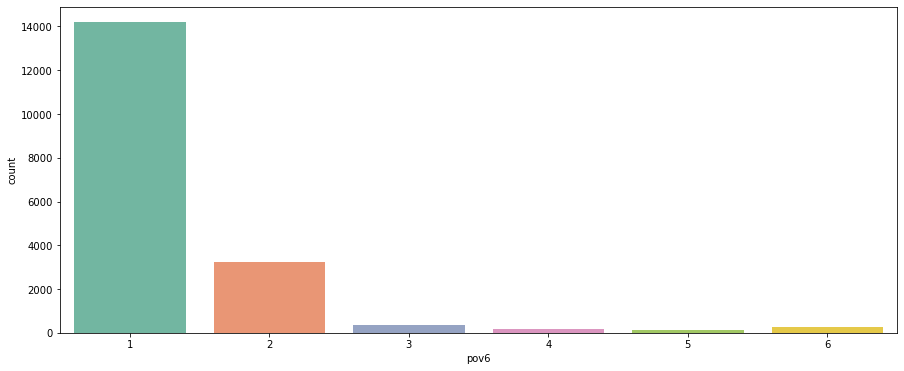

In [3]:
plt.figure(figsize=(15,6))
sns.countplot(train_data.pov6, palette='Set2')
plt.show()

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18379 entries, 0 to 18378
Columns: 300 entries, month to t.158
dtypes: float64(134), int64(164), object(2)
memory usage: 42.1+ MB


DATA has 18379 DATA POINTS and 300 FEATURES and the TARGET FEATURE is **'pov6'**

In [5]:
train_data.pov6

0        1
1        1
2        1
3        1
4        2
        ..
18374    1
18375    1
18376    5
18377    1
18378    2
Name: pov6, Length: 18379, dtype: int64

## TEST DATA

In [6]:
# READ TEST DATA
test_data = pd.read_csv('../input/highly-unbalanced-multiclass6-dataset/testdata.csv')
test_data = test_data[test_data.columns[1:]]
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4595 entries, 0 to 4594
Columns: 299 entries, month to f.284
dtypes: float64(127), int64(170), object(2)
memory usage: 10.5+ MB


## DROP DUPLICATES

In [7]:
train_data.drop_duplicates()

,month,var8,var6,a.1,a.2,a.3,a.4,var5,b.5,b.6,...,c.276,c.277,c.278,c.279,c.280,c.281,c.282,c.283,f.284,t.158
0,1,2.0,NaN,1,5,1,57,34,1,NaN,...,1,0,0,0,1,0,0,0,5.0,NaN
1,1,2.0,NaN,1,4,1,57,34,2,3.0,...,0,0,0,0,0,0,1,0,NaN,NaN
2,1,2.0,NaN,1,5,1,57,42,2,1.0,...,0,0,0,0,0,0,0,0,3.0,NaN
3,1,2.0,NaN,1,6,1,57,34,2,4.0,...,0,0,0,0,1,0,1,0,5.0,NaN
4,1,2.0,NaN,1,8,1,22,1,1,NaN,...,0,0,0,0,0,0,0,0,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18374,12,NaN,NaN,1,3,1,58,20,2,2.0,...,0,0,0,0,0,0,0,0,1.0,NaN
18375,12,NaN,NaN,1,3,1,123,31,1,NaN,...,0,0,0,0,0,0,0,0,2.0,NaN
18376,12,NaN,NaN,1,5,1,44,21,2,1.0,...,0,0,0,0,0,0,0,0,1.0,NaN
18377,12,NaN,NaN,1,4,1,44,21,1,NaN,...,0,0,1,0,0,0,1,0,1.0,NaN


#### NO DUPLICATES FOUND 

# REMOVE NULL VALUES


We will make a dictionary with column as KEY and total number of null values in that column as VALUE. Then we will sort that dictionary in descending order by VALUE and remove those columns that have more than 11000 null values.

In [8]:
# STORE ALL THE COLUMNS THAT HAS NULL VALUES 
train_null_columns = []

# ITERATE THROUGH TRAINING DATA COLUMNS AND CHECK WHETHER IT HAS NULL VALUES OR NOT
for index, rows in pd.DataFrame(train_data.isna().any()).iterrows():
    if rows[0] == True:
        # COLUMNS WITH NULL VALUES MORE THAN 11000
        if train_data[index].isna().sum() >= 11000:
            train_null_columns.append(index)
        
train_null_columns

['var6',
 'b.10',
 'b.11',
 'b.13',
 'b.14',
 'b.20',
 'b.21',
 'c.31',
 'c.36',
 'c.37',
 'c.61',
 'c.67',
 'f.105',
 'f.106',
 'f.107',
 'f.108',
 'f.109',
 'f.110',
 'f.111',
 'f.112',
 'f.113',
 'f.114',
 'f.115',
 'f.116',
 'f.117',
 'f.118',
 'f.119',
 'f.120',
 'f.121',
 'f.122',
 'f.123',
 'a.184',
 'a.185',
 'b.195',
 'c.215',
 'c.216',
 'c.217',
 'c.218',
 'c.219',
 'c.220',
 'c.221',
 'c.222',
 'c.223',
 't.158']

## SIMILARLY CHECK FOR THE NULL VALUES IN TEST DATA

As test data has 4595 datapoints we will check for the columns that has null values more than 4000

In [9]:
# STORE ALL THE COLUMNS THAT HAS NULL VALUES 
test_null_columns = []

# ITERATE THROUGH TEST DATA COLUMNS AND CHECK WHETHER IT HAS NULL VALUES OR NOT
for index, rows in pd.DataFrame(test_data.isna().any()).iterrows():
    if rows[0] == True:
        # COLUMNS WITH NULL VALUES MORE THAN 11000
        if test_data[index].isna().sum() >= 4000:
            test_null_columns.append(index)
        
test_null_columns    

['var6',
 'b.10',
 'b.11',
 'pov6',
 'c.36',
 'c.37',
 'c.61',
 'c.67',
 'f.105',
 'f.106',
 'f.107',
 'f.108',
 'f.109',
 'f.110',
 'f.111',
 'f.114',
 'f.115',
 'f.116',
 'f.117',
 'f.118',
 'f.119',
 'f.120',
 'f.121',
 'f.122',
 'f.123',
 'a.184',
 'a.185',
 'totshopping.rep',
 'c.215',
 'c.216',
 'c.217',
 'c.218',
 'c.219',
 'c.220',
 'c.221',
 'c.223']

## COMMON NULL COLUMNS TO BE DELETED

In [10]:
# COLUMNS THAT HAVE MOSTLY NULL VALUES IN TRAIN DATA BUT NOT IN TEST DATA
set(train_null_columns) - set(test_null_columns)

{'b.13',
 'b.14',
 'b.195',
 'b.20',
 'b.21',
 'c.222',
 'c.31',
 'f.112',
 'f.113',
 't.158'}

In [11]:
# COLUMNS THAT HAVE MOSTLY NULL VALUES TEST DATA BUT NOT IN TRAIN DATA
set(test_null_columns) - set(train_null_columns)

{'pov6', 'totshopping.rep'}

As we can see columns **'pov6' and 'totshopping.rep'** are having most of the null values in test data. 'pov6' is our label or target columns so we can delete this column from the test data and after storing the values of column 'pov6' in another variable named "label", we can delete it from the training data as well.

Lets analyse **'totshopping.rep'** whether we should delete it or not. 

In [12]:
test_data['totshopping.rep'].isna().sum()

4595

In [13]:
train_data['totshopping.rep'].isna().sum()

0

So here we can see that column **'totshopping.rep'** has all the values null in test data but no values null in the training data. Then the question is "WE SHOULD DELETE IT OR NOT"?

ANSWER IS "YES", because test data is what on we need to test our model and if the features are not present in the test data, it is totally irrelevant to include it in the training data.

****
So the TOTAL NULL COLUMNS TO BE DELETED are 

    train_null_columns + set(test_null_columns) - set(train_null_columns)
    
    i.e. train_null_columns + {'pov6', 'totshopping.rep'}
****

In [14]:
# TOTAL NULL COLUMNS TO BE DELETED
tot_cols = train_null_columns + list(set(test_null_columns) - set(train_null_columns))

print('TOTAL COLUMNS TO BE DELETED', len(tot_cols))

# DELETE THE NULL VALUED COLUMNS FROM TRAINING DATA 
filtered_data = train_data.drop(tot_cols, axis=1)

print('COLUMNS BEFORE', len(train_data.columns))
print('COLUMNS AFTER REMOVAL', len(filtered_data.columns))

TOTAL COLUMNS TO BE DELETED 46
COLUMNS BEFORE 300
COLUMNS AFTER REMOVAL 254


It has removed 46 columns with most of the null values. It has reduced features from 300 to 254.

In [15]:
# DELETE THE NULL VALUED COLUMNS FROM TEST DATA 
filtered_test_data = test_data.copy()

for col in tot_cols:
    try:
        filtered_test_data.drop([col], axis=1, inplace=True)
    except:
        print('{} COLUMN not in TEST DATA '.format(col))

print()
print('COLUMNS BEFORE', len(test_data.columns))
print('COLUMNS AFTER REMOVAL', len(filtered_test_data.columns))

t.158 COLUMN not in TEST DATA 

COLUMNS BEFORE 299
COLUMNS AFTER REMOVAL 254


Similarly it has reduced test data features from 299 to 254

## CHECK WHETHER TEST DATA AND TRAINING DATA BOTH HAVE SAME COLUMNS OR NOT

In [16]:
if set(filtered_data.columns.tolist()) == set(filtered_test_data.columns.tolist()):
    print('THEY BOTH HAVE SAME COLUMNS')
else:
    print(set(filtered_data.columns.tolist()) - set(filtered_test_data.columns.tolist()))
    print(set(filtered_test_data.columns.tolist()) - set(filtered_data.columns.tolist()))

THEY BOTH HAVE SAME COLUMNS


## MAKE LABEL

'pov6' column as LABEL data 

'filtered_data' is our FEATURE data.

In [17]:
# MAKE LABEL
label = pd.DataFrame(train_data.pov6)

## STRING FEATURE VALUES

List all the features columns that has string values.

In [18]:
# SELECT COLUMNS WITH OBJECT DATATYPE
filtered_data.columns[filtered_data.dtypes=='object']

Index(['var9', 'respondent.id'], dtype='object')

In [19]:
filtered_data['var9'].head()

0     Mono
1     Mono
2    Multi
3     Mono
4    Multi
Name: var9, dtype: object

In [20]:
filtered_data['respondent.id'].head()

0    2016_1
1    2016_2
2    2016_3
3    2016_4
4    2016_5
Name: respondent.id, dtype: object

As we can see column **respondent.id** is not of any use, so we can delete it. We need to encode column **var9** to numerical values, we can do one hot encoding using **pandas.get_dummies**

In [21]:
# ENCODE STRING COLUMNS 
pd.get_dummies(filtered_data.var9)

,Mono,Multi
0,1,0
1,1,0
2,0,1
3,1,0
4,0,1
...,...,...
18374,1,0
18375,1,0
18376,1,0
18377,1,0


## CONCATENATE THE ENCODED DATA WITH TRAINING DATA 

After concatenation , remove both the string columns

In [22]:
# CONCAT THE DUMMY DATA WITH THE TRAINING DATA
filtered_data = pd.concat([filtered_data, pd.get_dummies(filtered_data.var9)], axis=1 )

# REMOVE UNWANTED STRING COLUMN
filtered_data.drop(['respondent.id','var9'], axis=1, inplace=True)
len(filtered_data.columns)

254

## SAME FOR TEST DATA

In [23]:
# CONCAT THE DUMMY DATA WITH THE TEST DATA
filtered_test_data = pd.concat([filtered_test_data, pd.get_dummies(filtered_test_data.var9)], axis=1 )

# REMOVE UNWANTED STRING COLUMN
filtered_test_data.drop(['respondent.id','var9'], axis=1, inplace=True)
len(filtered_test_data.columns)

254

## FILL NULL VALUES WITH MEAN

Fill the null values of each column with mean value of that particular column.

In [24]:
# BEFORE REMOVING NULL VALUES
filtered_data.head()

,month,var8,a.1,a.2,a.3,a.4,var5,b.5,b.6,b.7,...,c.277,c.278,c.279,c.280,c.281,c.282,c.283,f.284,Mono,Multi
0,1,2.0,1,5,1,57,34,1,NaN,1,...,0,0,0,1,0,0,0,5.0,1,0
1,1,2.0,1,4,1,57,34,2,3.0,1,...,0,0,0,0,0,1,0,NaN,1,0
2,1,2.0,1,5,1,57,42,2,1.0,1,...,0,0,0,0,0,0,0,3.0,0,1
3,1,2.0,1,6,1,57,34,2,4.0,1,...,0,0,0,1,0,1,0,5.0,1,0
4,1,2.0,1,8,1,22,1,1,NaN,1,...,0,0,0,0,0,0,0,5.0,0,1


In [25]:
# FILL ALL THE NULL VALUES WITH MEAN
filtered_data.fillna(filtered_data.mean(), inplace=True)
filtered_data.head()

,month,var8,a.1,a.2,a.3,a.4,var5,b.5,b.6,b.7,...,c.277,c.278,c.279,c.280,c.281,c.282,c.283,f.284,Mono,Multi
0,1,2.0,1,5,1,57,34,1,2.224272,1,...,0,0,0,1,0,0,0,5.000000,1,0
1,1,2.0,1,4,1,57,34,2,3.000000,1,...,0,0,0,0,0,1,0,3.038536,1,0
2,1,2.0,1,5,1,57,42,2,1.000000,1,...,0,0,0,0,0,0,0,3.000000,0,1
3,1,2.0,1,6,1,57,34,2,4.000000,1,...,0,0,0,1,0,1,0,5.000000,1,0
4,1,2.0,1,8,1,22,1,1,2.224272,1,...,0,0,0,0,0,0,0,5.000000,0,1


## SAME FOR THE TEST DATA

In [26]:
# FILL ALL THE NULL VALUES WITH MEAN
filtered_test_data.fillna(filtered_test_data.mean(), inplace=True)
filtered_test_data.head()

,month,var8,a.1,a.2,a.3,a.4,var5,b.5,b.6,b.7,...,c.277,c.278,c.279,c.280,c.281,c.282,c.283,f.284,Mono,Multi
0,1,1.0,1,11,1,47,8,2,1.000000,1,...,0,0,0,0,0,1,0,3.000000,0,0
1,1,2.0,1,11,1,65,27,1,2.247994,1,...,0,0,0,0,0,0,0,3.000000,1,0
2,1,2.0,1,6,1,65,27,2,1.000000,1,...,0,0,0,0,0,1,0,3.000000,1,0
3,1,1.0,1,3,1,3,2,1,2.247994,1,...,0,0,0,0,0,0,0,3.079814,0,0
4,1,1.0,1,5,1,83,3,1,2.247994,1,...,0,0,0,1,0,0,0,3.079814,0,1


## SCALE THE FEATURES BETWEEN 0-1

Scaling is very important to range the columns into same range. MinMaxScaler ranges the data between 0 to 1.

In [27]:
# INITIALISE SCALER
scaler = MinMaxScaler()

# CREATE DATAFRAME OF THE SCALED DATA
scaled_train_data = pd.DataFrame(scaler.fit_transform(filtered_data), index=filtered_data.index, columns=filtered_data.columns)
scaled_train_data.head()

,month,var8,a.1,a.2,a.3,a.4,var5,b.5,b.6,b.7,...,c.277,c.278,c.279,c.280,c.281,c.282,c.283,f.284,Mono,Multi
0,0.0,0.5,0.0,0.363636,0.0,0.407407,0.673469,0.0,0.408091,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.000000,1.0,0.0
1,0.0,0.5,0.0,0.272727,0.0,0.407407,0.673469,1.0,0.666667,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.509634,1.0,0.0
2,0.0,0.5,0.0,0.363636,0.0,0.407407,0.836735,1.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.0,1.0
3,0.0,0.5,0.0,0.454545,0.0,0.407407,0.673469,1.0,1.000000,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.000000,1.0,0.0
4,0.0,0.5,0.0,0.636364,0.0,0.148148,0.000000,0.0,0.408091,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,1.0


## SAME FOR THE TEST DATA

In [28]:
# CREATE DATAFRAME OF THE SCALED DATA
scaled_test_data = pd.DataFrame(scaler.fit_transform(filtered_test_data), index=filtered_test_data.index, columns=filtered_test_data.columns)
scaled_test_data.head()

,month,var8,a.1,a.2,a.3,a.4,var5,b.5,b.6,b.7,...,c.277,c.278,c.279,c.280,c.281,c.282,c.283,f.284,Mono,Multi
0,0.0,0.0,0.0,0.909091,0.0,0.328358,0.142857,1.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.500000,0.0,0.0
1,0.0,0.5,0.0,0.909091,0.0,0.462687,0.530612,0.0,0.415998,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,1.0,0.0
2,0.0,0.5,0.0,0.454545,0.0,0.462687,0.530612,1.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.500000,1.0,0.0
3,0.0,0.0,0.0,0.181818,0.0,0.000000,0.020408,0.0,0.415998,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.519953,0.0,0.0
4,0.0,0.0,0.0,0.363636,0.0,0.597015,0.040816,0.0,0.415998,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.519953,0.0,1.0


## CHECK LABEL OR TARGET COLUMN

Check the distribution of the 6 classes among the dataset

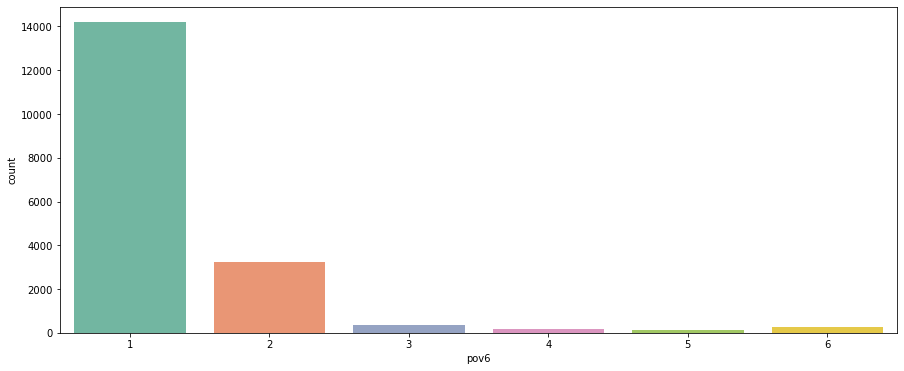

Class=1, n=14197 (77.246%)
Class=2, n=3246 (17.661%)
Class=4, n=183 (0.996%)
Class=6, n=285 (1.551%)
Class=3, n=335 (1.823%)
Class=5, n=133 (0.724%)


In [29]:
# PLOT DISTRIBUTION OF THE TARGET CLASSES
plt.figure(figsize=(15,6))
sns.countplot(label.pov6, palette='Set2')
plt.show()

# SUMMARIZE DISTRIBUTION
counter = Counter(label.pov6)
for k,v in counter.items():
    per = v / len(label) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

As we can see, it is highly unbalanced data with 77 % of the data in class 1 and rest of the data falls in other classes. So we will use resampling technique. 

Resampling techniques include undersampling and oversampling. **Undersampling** means reducing the majority classes to the minority class and **Oversampling** means increasing the minority classes to the majority class.

We will not use Undersampling because minority class has 133 datapoints and reducing to such a less number will reduce our datapoints which is not good for the classification. Hence we will go for Oversampling.

## BALANCE THE LABEL DATA BY OVERSAMPLING & UNDERSAMPLING 

## SMOTE 

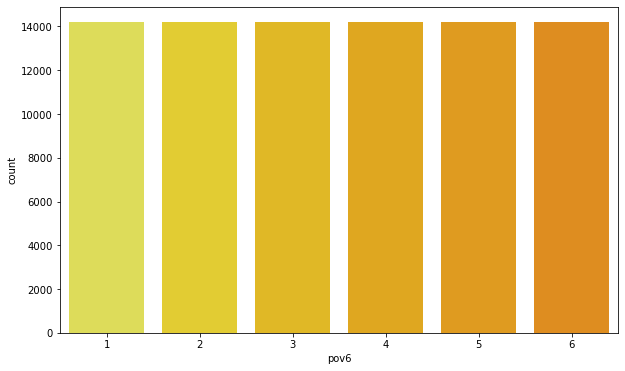

Class=1, n=14197 (16.667%)
Class=2, n=14197 (16.667%)
Class=4, n=14197 (16.667%)
Class=6, n=14197 (16.667%)
Class=3, n=14197 (16.667%)
Class=5, n=14197 (16.667%)


In [30]:
# PERFORM OVERSAMPLING USING SMOTE ( SYNTHETIC MINORITY OVERSAMPLING TECHNIQUE )
oversample = SMOTE()
X_over, y_over = oversample.fit_resample(scaled_train_data, label)

# PLOT THE NEW DATA
plt.figure(figsize=(10,6))
sns.countplot(y_over.pov6, palette='Wistia')
plt.show()

# SUMMARIZE DISTRIBUTION
counter = Counter(y_over.pov6)
for k,v in counter.items():
    per = v / len(y_over) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

## NearMiss 1

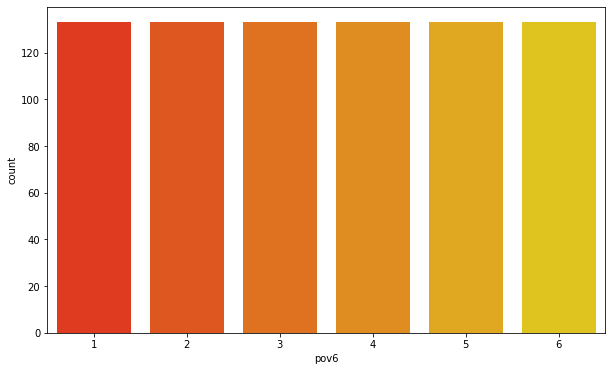

Class=1, n=133 (16.667%)
Class=2, n=133 (16.667%)
Class=3, n=133 (16.667%)
Class=4, n=133 (16.667%)
Class=5, n=133 (16.667%)
Class=6, n=133 (16.667%)


In [31]:
undersample = NearMiss(version=1, n_neighbors=3)
# transform the dataset
X_under, y_under = undersample.fit_resample(scaled_train_data, label)

# PLOT THE NEW DATA
plt.figure(figsize=(10,6))
sns.countplot(y_under.pov6, palette='autumn')
plt.show()

# SUMMARIZE DISTRIBUTION
counter = Counter(y_under.pov6)
for k,v in counter.items():
    per = v / len(y_under) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

Now the data is balanced.

## CLASSIFICATION 

## TEST MULTIPLE CLASSIFICATION ALGORITHMS ON UNDERSAMPLED DATA

We will test multiple classification algorithms on undersampled data and choose the algorithm with high F beta score. F beta score is a generalized form of F1 score. F1 score has precision and recall equal weightage. In Fbeta score, you can give weightage to precision and recall using parameter beta. We will give Recall higher preference. 

Then the best algorithm will be fit on both UNDERSAMPLED and OVERSAMPLED data and we will compare which resampling technique gives the best results.

In [32]:
# CREATE PIPELINE OF ALL THE POSSIBLE CLASSIFIERS
est =[]

est.append(('SVC', Pipeline([('SVC', SVC(gamma='scale', class_weight='balanced'))])))
est.append(('GradientBoosting', Pipeline([('GradientBoosting',GradientBoostingClassifier())])))
est.append(('AdaBoost', Pipeline([ ('AdaBoost', AdaBoostClassifier())])))
est.append(('ExtraTree', Pipeline([('ExtraTrees', ExtraTreesClassifier())])))
est.append(('RandomForest', Pipeline([('RandomForest', RandomForestClassifier())]))) 
est.append(('Bagging', Pipeline([('Bagging', BaggingClassifier())])))
est.append(('KNeighbors', Pipeline([('KNeighbors', KNeighborsClassifier())])))
est.append(('DecisionTree', Pipeline([('DecisionTree', DecisionTreeClassifier())])))
# est.append(('XGB', Pipeline([('XGB', XGBClassifier())])))

We will use Repeated Stratified K-Fold model validation technique to train the model. It repeats Stratified K-Fold n times with different randomization in each repetition. Stratified K-Fold cross-validation object is a variation of KFold that returns stratified folds. The folds are made by preserving the percentage of samples for each class. 

It will make sure that model is overfitted.

## Train the UNDERSAMPLED data with different classifiers

In [33]:
import warnings
warnings.filterwarnings(action='ignore')

seed = 4
splits = 5

# CALCULATE F1 SCORE WITH MORE WEIGHT ON RECALL
f_score = make_scorer(fbeta_score, beta=2, average='macro')
models_score =[]

for i in est:
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
    results = cross_val_score(i[1], X_under, y_under, cv=cv, scoring=f_score)
    models_score.append({i[0] : '{} +/- {}'.format(results.mean(), results.std())})

In [34]:
print("F1 SCORES OF DIFFERENT CLASSIFIERS")
models_score

F1 SCORES OF DIFFERENT CLASSIFIERS


[{'SVC': '0.7364519447217158 +/- 0.027315537428438463'},
 {'GradientBoosting': '0.8918568151906339 +/- 0.025585579208257863'},
 {'AdaBoost': '0.5386930183605194 +/- 0.1456766826124554'},
 {'ExtraTree': '0.8102332447952961 +/- 0.03502519994553447'},
 {'RandomForest': '0.8190086627722997 +/- 0.033911821956679994'},
 {'Bagging': '0.8484276274728455 +/- 0.03199955801350012'},
 {'KNeighbors': '0.6133847410554039 +/- 0.040020123924571334'},
 {'DecisionTree': '0.7910144280473919 +/- 0.0341990977627551'}]

As we can see GradientBoosting (89%) , Bagging (84%) has great Fbeta scores. We will choose the one with the highest Fbeta score. 

## FIT THE BEST MODEL ON THE UNDERSAMPLED DATA

In [35]:
model = GradientBoostingClassifier()
model.fit(X_under, y_under.pov6)
# PREDICT ON THE TEST DATA
predict_under = model.predict(scaled_test_data)

## FIT THE BEST MODEL ON THE OVERSAMPLED DATA

In [36]:
model_ = GradientBoostingClassifier()
model_.fit(X_over, y_over.pov6)
# PREDICT ON THE TEST DATA
predict_over = model_.predict(scaled_test_data)

## UNDERSAMPLED vs OVERSAMPLED PREDICTED DISTRIBUTION COMPARISON

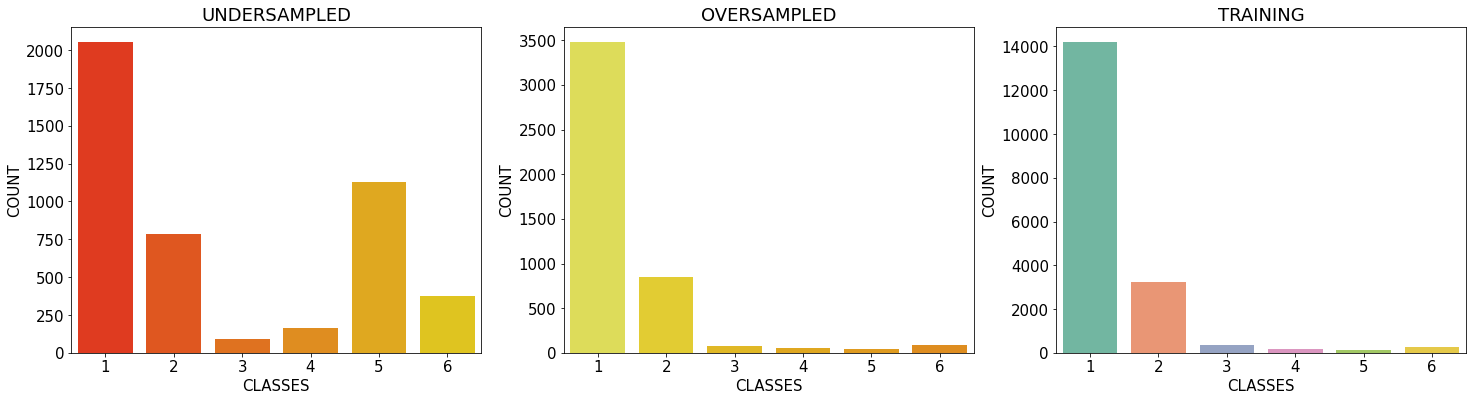

DISTRIBUTION OF PREDICTED UNDERSAMPLED CLASSES
Class=1, n=2053 (44.679%)
Class=2, n=783 (17.040%)
Class=4, n=165 (3.591%)
Class=6, n=378 (8.226%)
Class=5, n=1126 (24.505%)
Class=3, n=90 (1.959%)

DISTRIBUTION OF PREDICTED OVERSAMPLED CLASSES
Class=1, n=3479 (75.713%)
Class=4, n=55 (1.197%)
Class=2, n=854 (18.585%)
Class=3, n=80 (1.741%)
Class=6, n=84 (1.828%)
Class=5, n=43 (0.936%)


In [37]:
l = [predict_under, predict_over, train_data.pov6]
pal = ["autumn",'Wistia','Set2']
titles =['UNDERSAMPLED', 'OVERSAMPLED', 'TRAINING']

plt.figure(figsize=(25,6))
plt.rc('font', size=15)
for i in range(3):
    plt.subplot(1,3, i+1)
    sns.countplot(l[i], palette=pal[i])
    plt.title(titles[i])
    plt.xlabel('CLASSES')
    plt.ylabel('COUNT')
plt.show()

# SUMMARIZE DISTRIBUTION
print('DISTRIBUTION OF PREDICTED UNDERSAMPLED CLASSES')
counter = Counter(predict_under)
for k,v in counter.items():
    per = v / len(predict_under) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
    
print()
print('DISTRIBUTION OF PREDICTED OVERSAMPLED CLASSES')
counter = Counter(predict_over)
for k,v in counter.items():
    per = v / len(predict_over) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

### As we can see OVERSAMPLED data retains the same distribution of the classes same as the training data. Thus we can conclude that the OVERSAMPLING technique is not good.

### Whereas UNDERSAMPLED data, gives a good result as the classes are not skewed. Let's experiment with some more undersampled techniques.

## DIFFERENT UNDERSAMPLED TECHNIQUES

### * NearMiss 2
     NearMiss(version=2, n_neighbors=3)
### * NearMiss 3
     NearMiss(version=3, n_neighbors=3)
### * Condensed Nearest Neighbour
     CondensedNearestNeighbour(n_neighbors=1)
### * Tomek Links
     TomekLinks()
### * Edited Nearest Neighbours
     EditedNearestNeighbours(n_neighbors=3)

## COMBINED TECHNIQUES 

### * One Sided Selection   (Tomek Links and the Condensed Nearest Neighbor (CNN))
     OneSidedSelection(n_neighbors=1, n_seeds_S=200)
### * Neighborhood Cleaning Rule (Condensed Nearest Neighbor & Edited Nearest Neighbors )
     NeighbourhoodCleaningRule(n_neighbors=3, threshold_cleaning=0.5)

## Alert ! Following code takes a lot of time 

In [38]:
# NEAR MISS VERSION 2
undersample = NearMiss(version=2, n_neighbors=3)
# transform the dataset
X_near2, y_near2 = undersample.fit_resample(scaled_train_data, label)

# NEAR MISS VERSION 3
undersample = NearMiss(version=3, n_neighbors=3)
# transform the dataset
X_near3, y_near3 = undersample.fit_resample(scaled_train_data, label)

# CONDENSED NEAREST NEIGHBOUR
undersample = CondensedNearestNeighbour(n_neighbors=1)
# transform the dataset
X_cnn, y_cnn = undersample.fit_resample(scaled_train_data, label)

# TOMEK LINKS
undersample = TomekLinks()
# transform the dataset
X_tomek, y_tomek = undersample.fit_resample(scaled_train_data, label)

# EDITED NEAREST NEIGHBOURS
undersample = EditedNearestNeighbours(n_neighbors=3)
# transform the dataset
X_enn, y_enn = undersample.fit_resample(scaled_train_data, label)

# ONE SIDED SELECTION 
undersample = OneSidedSelection(n_neighbors=1, n_seeds_S=200)
# transform the dataset
X_oss, y_oss = undersample.fit_resample(scaled_train_data, label)

# NEIGHBOURHOOD CLEANING RULE
undersample = NeighbourhoodCleaningRule(n_neighbors=3, threshold_cleaning=0.5)
# transform the dataset
X_ncr, y_ncr = undersample.fit_resample(scaled_train_data, label)

In [39]:
model = GradientBoostingClassifier()

# FIT ON NEAR MISS VERSION 2
model.fit(X_near2, y_near2)
# PREDICT ON THE TEST DATA
predict_near2 = model.predict(scaled_test_data)

# NEAR MISS VERSION 3
model.fit(X_near3, y_near3)
predict_near3 = model.predict(scaled_test_data)

# CONDENSED NEAREST NEIGHBOUR
model.fit(X_cnn, y_cnn)
predict_cnn = model.predict(scaled_test_data)

# TOMEK LINKS
model.fit(X_tomek, y_tomek)
predict_tomek = model.predict(scaled_test_data)

# EDITED NEAREST NEIGHBOURS
model.fit(X_enn, y_enn)
predict_enn = model.predict(scaled_test_data)

# ONE SIDED SELECTION
model.fit(X_oss, y_oss)
predict_oss = model.predict(scaled_test_data)

# NEIGHBOURHOOD CLEANING RULE
model.fit(X_ncr, y_ncr)
predict_ncr = model.predict(scaled_test_data)

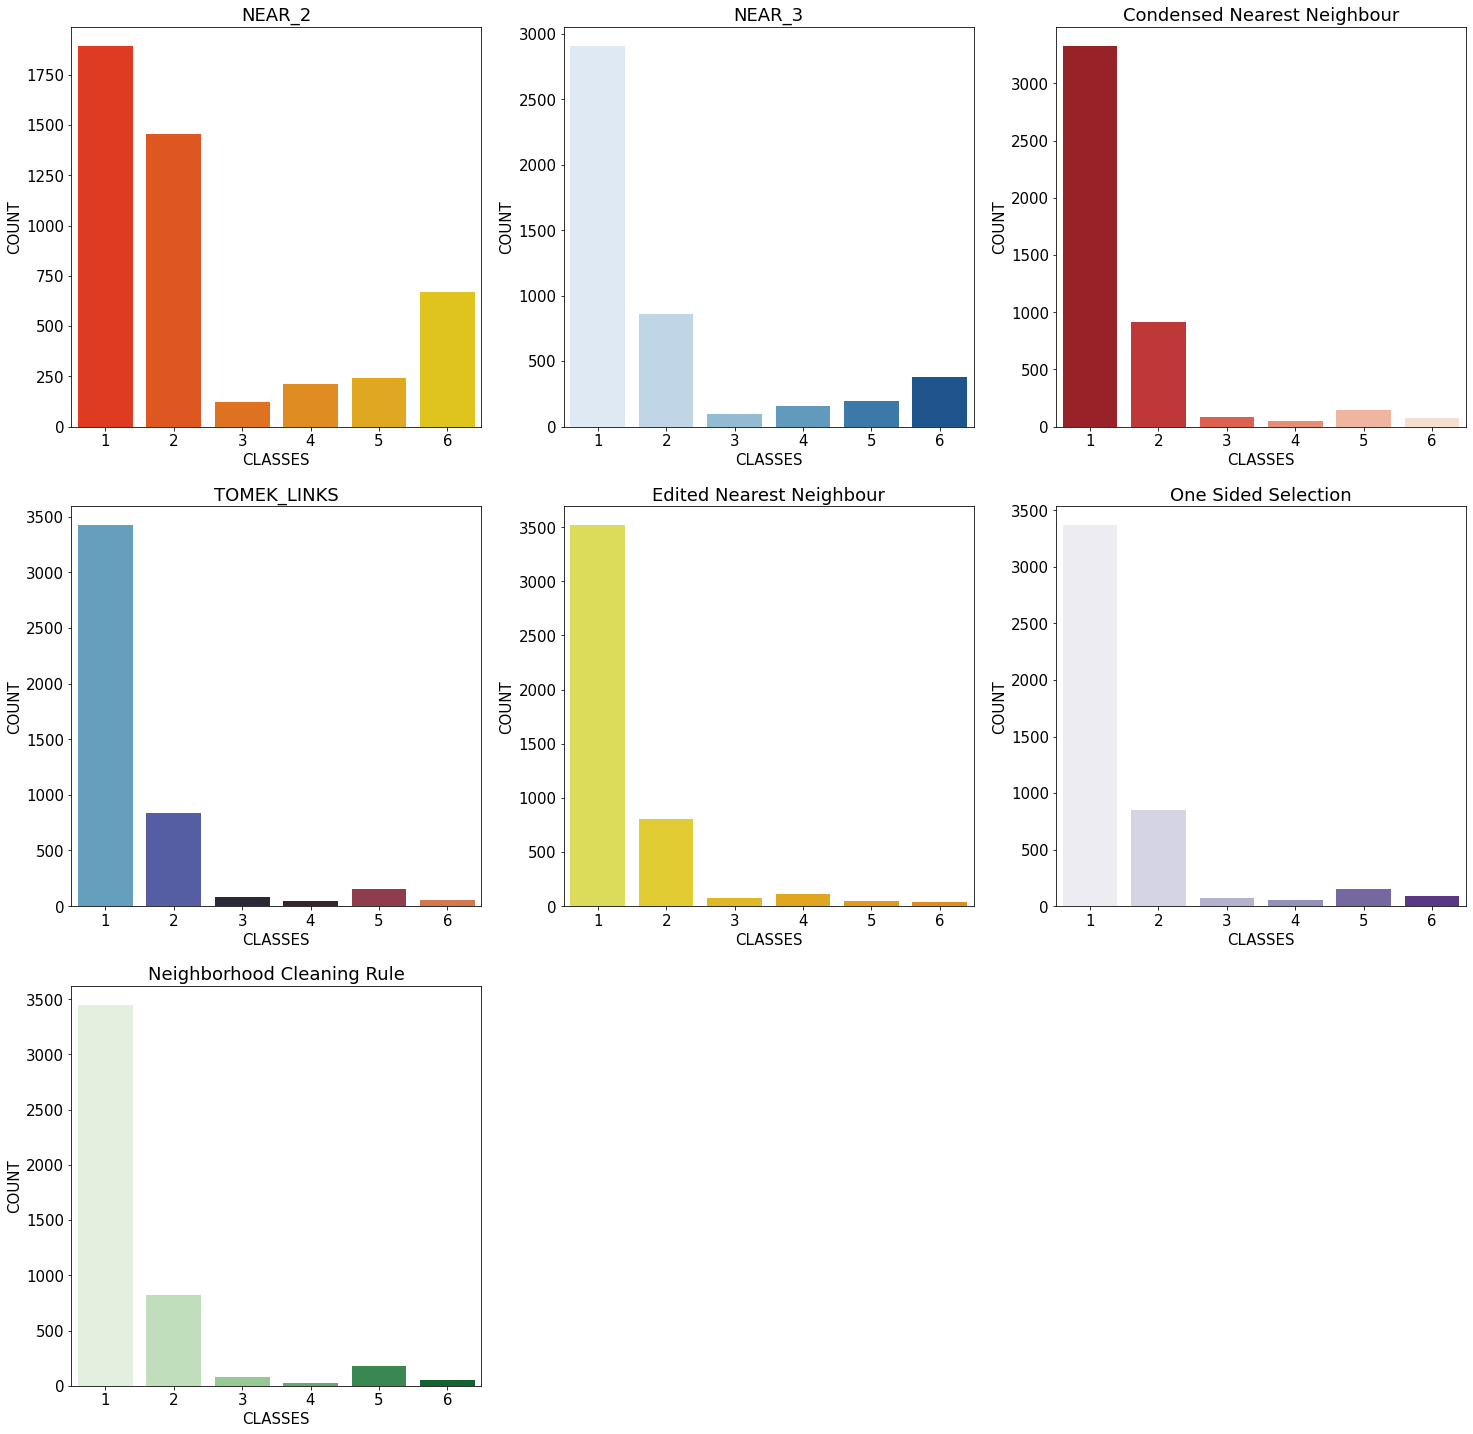

In [43]:
pred_list = [predict_near2, predict_near3, predict_cnn, predict_tomek, predict_enn, predict_oss, predict_ncr]
pal = ['autumn','Blues','Reds_r', 'icefire', 'Wistia','Purples', 'Greens']
titles =['NEAR_2', 'NEAR_3', 'Condensed Nearest Neighbour', 'TOMEK_LINKS', 'Edited Nearest Neighbour', 'One Sided Selection', 'Neighborhood Cleaning Rule']

plt.figure(figsize=(25,25))
plt.rc('font', size=15)
for i in range(len(pred_list)):
    plt.subplot(3, 3, i+1)
    sns.countplot(pred_list[i], palette=pal[i])
    plt.title(titles[i])
    plt.xlabel('CLASSES')
    plt.ylabel('COUNT')
plt.show()

### We can see from the prediction plot except Near Miss version 2, no one has given non skewed values

## COMPARISON BETWEEN NearMiss 1 vs NearMiss 2

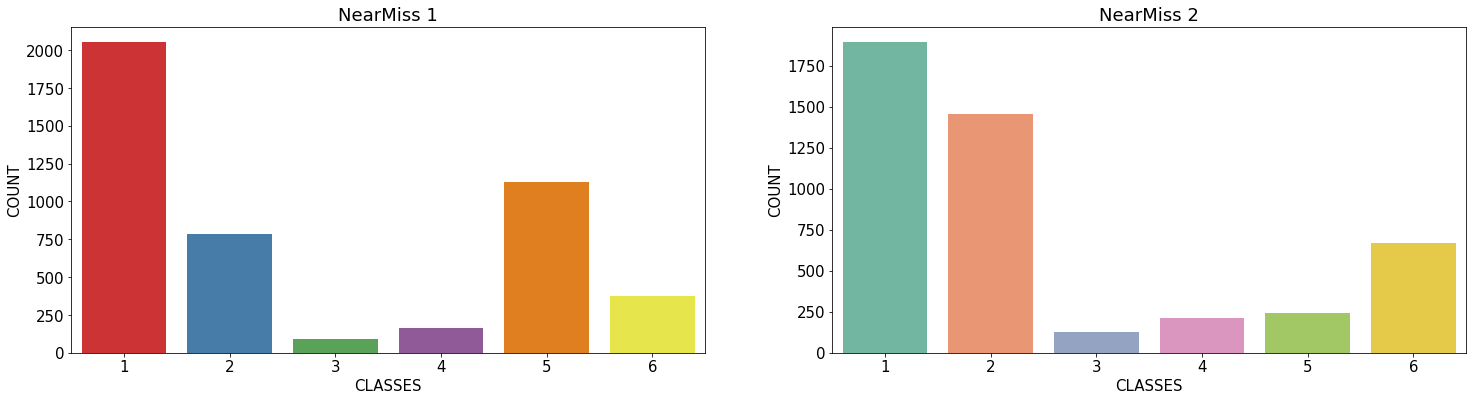

NearMiss Version 1
Class=1, n=2053 (44.679%)
Class=2, n=783 (17.040%)
Class=4, n=165 (3.591%)
Class=6, n=378 (8.226%)
Class=5, n=1126 (24.505%)
Class=3, n=90 (1.959%)


NearMiss Version 2
Class=6, n=670 (14.581%)
Class=2, n=1453 (31.621%)
Class=4, n=212 (4.614%)
Class=1, n=1894 (41.219%)
Class=5, n=242 (5.267%)
Class=3, n=124 (2.699%)


In [46]:
l = [predict_under, predict_near2]
pal = ['Set1','Set2']
titles =['NearMiss 1', 'NearMiss 2']

plt.figure(figsize=(25,6))
plt.rc('font', size=15)
for i in range(2):
    plt.subplot(1,2, i+1)
    sns.countplot(l[i], palette=pal[i])
    plt.title(titles[i])
    plt.xlabel('CLASSES')
    plt.ylabel('COUNT')
plt.show()

print('NearMiss Version 1')
counter = Counter(predict_under)
for k,v in counter.items():
    per = v / len(predict_under) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

print()
print()
print('NearMiss Version 2')
counter = Counter(predict_near2)
for k,v in counter.items():
    per = v / len(predict_near2) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

## Both have given non-skewed values for this dataset, hence we can conclude that for multidimensional datasets using Undersampling techniques are better.